<h1 style='color:blue'>Random Forest</h1>

<p>A Random Forest is an ensemble of multiple decision trees, where each tree is trained on a different subset of the data with bootstrapping and uses feature randomness to make predictions. The final prediction in a Random Forest is typically determined by a majority vote or weighted average of the individual decision tree predictions.</p>

<ul>
    <li>Random Forest Classifier</li>
    <li>Random Forest Regression</li>   
</ul>

<h3 style='color: red'>Random Forest Classifier</h3>
<p>The RandomForestClassifier works on classification problem, which help to predict weather yes or no, or the particular finite set of decision conditions.</p>

<h3 style='color: red'>Random Forest Regression</h3>
<p>The RandomForestRegression works on Regression problem, which help to predict the actual target value.</p>

<div align='center'>
    <img src='RF.png' width=500> 
</div>

**`note`** : the *Random Forest* algorithm generates multiple *Decision Trees* in which predict the result, which the resultant are obtained by the majarity of them.

In [110]:
# importing the modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# load the dataset
from sklearn.datasets import load_digits

In [3]:
data = load_digits()

In [4]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [11]:
x = data.data
y = data.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
# creating the dataframe for better visualisation
df = pd.DataFrame(x, columns=data.feature_names)

In [13]:
df['target'] = data.target

In [14]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [17]:
# save to excel file
df.to_excel('digits classification.xlsx', sheet_name='sheet 1', index=None)

<h2 style='color: green'>Visualisation the digits</h2>


		The actual image is 0
		---------------------


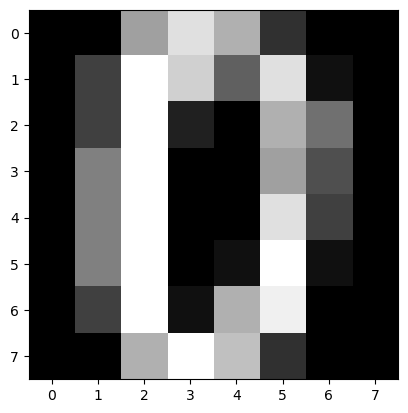


		The actual image is 9
		---------------------


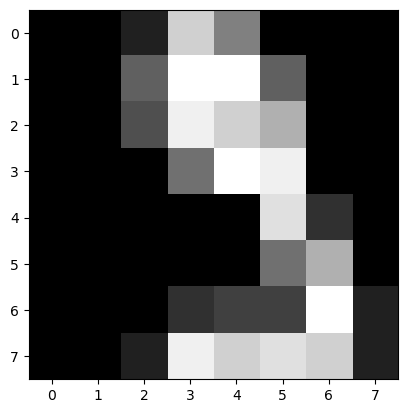


		The actual image is 5
		---------------------


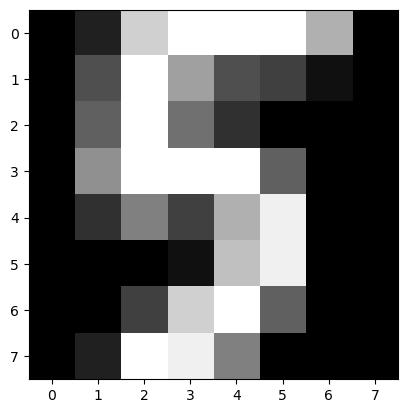


		The actual image is 5
		---------------------


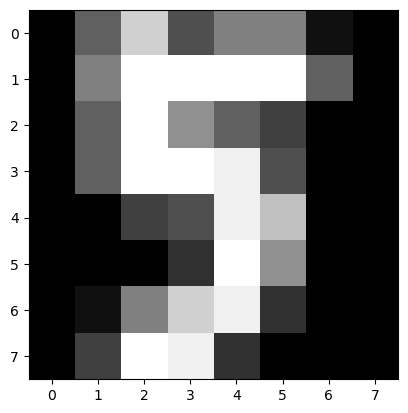


		The actual image is 6
		---------------------


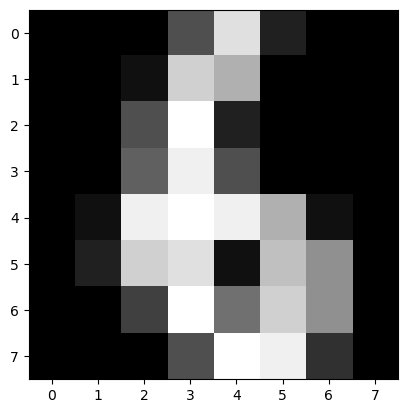

In [28]:
plt.gray()
for i in range(30, 35):
    print(f"\n\t\tThe actual image is {data.target[i]}")
    print(f"\t\t---------------------")
    plt.imshow(data.images[i])
    plt.show()

In [31]:
# creating the x and y and splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [32]:
# creating the model
model = RandomForestClassifier(n_estimators=100)  

**`note`** : *n_estimators* means how many decision trees to create, so then the model accuracy will increase. 

In [33]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
model.score(x_test, y_test)  # each and every time changing the n_estimators the score will increase

0.9666666666666667

### Perdicting the best score form n_estimators

In [100]:
for i in range(1, 100):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"n_estimators: {i} and score: {round(score*100)}%")

n_estimators: 1 and score: 77%
n_estimators: 2 and score: 77%
n_estimators: 3 and score: 86%
n_estimators: 4 and score: 87%
n_estimators: 5 and score: 91%
n_estimators: 6 and score: 93%
n_estimators: 7 and score: 93%
n_estimators: 8 and score: 93%
n_estimators: 9 and score: 94%
n_estimators: 10 and score: 94%
n_estimators: 11 and score: 96%
n_estimators: 12 and score: 95%
n_estimators: 13 and score: 97%
n_estimators: 14 and score: 96%
n_estimators: 15 and score: 96%
n_estimators: 16 and score: 97%
n_estimators: 17 and score: 96%
n_estimators: 18 and score: 97%
n_estimators: 19 and score: 96%
n_estimators: 20 and score: 94%
n_estimators: 21 and score: 97%
n_estimators: 22 and score: 96%
n_estimators: 23 and score: 96%
n_estimators: 24 and score: 96%
n_estimators: 25 and score: 97%
n_estimators: 26 and score: 96%
n_estimators: 27 and score: 97%
n_estimators: 28 and score: 96%
n_estimators: 29 and score: 96%
n_estimators: 30 and score: 97%
n_estimators: 31 and score: 97%
n_estimators: 32 

In [99]:
model = RandomForestClassifier(n_estimators=77)
model.fit(x_train, y_train)
model.score(x_test, y_test)     

0.975

*nearly the model score is 98%*

In [107]:
y_prediction = model.predict(x_test)

In [111]:
confusion_matrix = confusion_matrix(y_test, y_prediction)
confusion_matrix

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  3,  0,  0,  1,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 30]], dtype=int64)

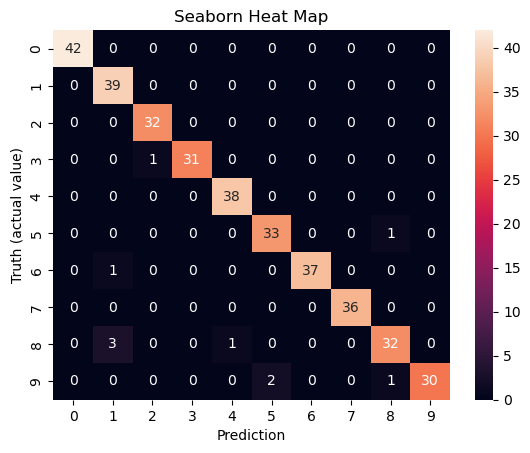

In [114]:
plt.title('Seaborn Heat Map')
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth (actual value)')
plt.show()

from the given heatmap graph, (8, 1) returns 3, which means the actual value to predict is 8, but 3 times it mis predicted as 1